<a href="https://colab.research.google.com/github/fchakkapat/DE_workshop/blob/main/Workshop_2_Using_pySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 2_Using pySpark
ref

*   https://medium.com/grabngoinfo/install-pyspark-3-on-google-colab-the-easy-way-577ec4a2bcd8
*   https://gist.github.com/BestChanyanart/1f518a7dd857d017801acf6c9355eab5
*   https://github.com/WoradaS/Road_to_Data-Engineer/tree/main/Data%20Cleansing%20with%20Spark




## 1.Set up pyspark

In [ ]:
# 1. Installing Spark and PySpark 

# อัพเดท Package ทั้งหมด ของ VM(ubuntu)ในcolabเอง
!apt-get update 

# ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
#เพราะว่าspark ต้องรันบนJava Virtual Machine(JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark 3.3.1
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

# Unzip ไฟล์ Spark 3.3.1
!tar xf spark-3.3.1-bin-hadoop3.tgz 

!pip install -q findspark==1.3.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:14 http://ppa.launchpad.net/c2d4u.team/

In [ ]:
# 2. Set up the environment for Spark.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.1-bin-hadoop3'

In [ ]:
# 3. Install pyspark
!pip install pyspark==3.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 16.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=188f4e6085cee362f47e0daafd8f83e7074c66d2a91d9550f68f01fda18ff4f7
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
#4. Creat Spark session
# สร้าง Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
  #สร้างmaster เป็นเครื่องlocal(คอมเครื่องนี้)                        

# Get Python version
import sys
sys.version_info
spark.version

'3.3.1'

In [ ]:
#5. เชื่อมต่อ Google colab กับ Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#6. Load data from GG drive TIP! : copy path ในfileของcolab
dt = spark.read.csv('/content/drive/MyDrive/R2DE-Workshop2/Online Retail.csv', header = True, inferSchema = True,)

dt.show() # Show Schema
dt.dtypes #data type
dt.printSchema() # Show Schema (อีกแบบ)

# นับจำนวนRow และ column
print((dt.count(), len(dt.columns)))

# สรุปข้อมูลสถิติ
dt.describe().show()

# สรุปข้อมูลสถิติ ที่มีpercentile เพิ่มเข้า 25%,50%,75% (กราฟระฆังคว่ำแบ่ง4ส่วน)
dt.summary().show()

# สรุปข้อมูลสถิติเฉพาะ column ที่ระบุ
dt.select("Quantity", "UnitPrice").describe().show()

# Median = 50% Q
dt.select("Quantity").summary().show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

## 2.EDA

In [ ]:
#Exploratory Data Analysis (EDA) คือ การทำความเข้าใจข้อมูล/สำรวจข้อมูล

# Non-Graphical EDA : show ไม่สวย

# Select text-based information
dt.where(dt['Quantity'] > 0).show()

# ลองเลือก Quantity ระหว่าง 50 - 120
dt.where( dt['Quantity'].between(50, 120) ).show()
dt.where( (dt['Quantity'] > 50 ) & (dt['Quantity'] < 120) ).show()

# ลองเลือก UnitPrice ระหว่าง 0.1 - 0.5
dt.where( dt['UnitPrice'].between(0.1, 0.5) ).show()

# Quantity ระหว่าง 50 - 120 และ UnitPrice ระหว่าง 0.1 - 0.5
dt.where( (dt['Quantity'].between(50,120)) & (dt['unitprice'].between(0.1, 0.5))  ).show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


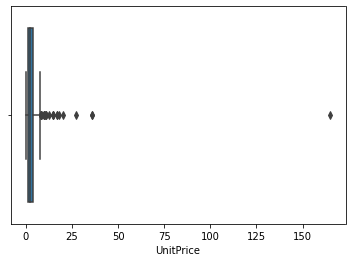

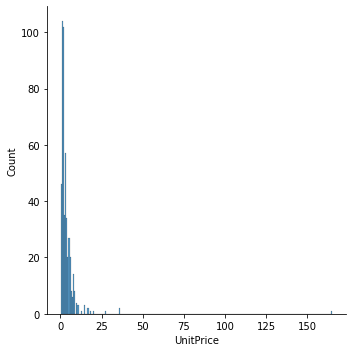

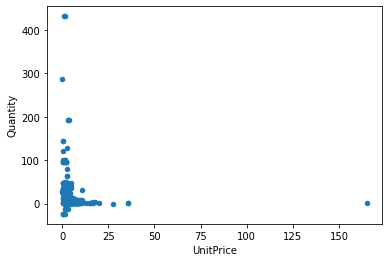

In [ ]:
# Graphical EDA : show สวย

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# แปลง Spark Dataframe เป็น Pandas Dataframe
dt_pd = dt.toPandas()


# เลือกข้อมูล 500 แถวแรกเพื่อความรวดเร็วและความเรียบง่ายในการ visualize ข้อมูล
dt_pd_subset = dt_pd[0:500]

# Boxplot
sns.boxplot(dt_pd_subset['UnitPrice'])

# Histogram
sns.displot(data=dt_pd_subset['UnitPrice']) 
plt.show() #ใส่ไว้เพื่อไม่ให้มันทับกัน

# Scatterplot
dt_pd_subset.plot.scatter('UnitPrice', 'Quantity')

# Plotly - interactive chart
import plotly.express as px
fig = px.scatter(dt_pd_subset, 'UnitPrice', 'Quantity')
fig.show()

## 3.Data Cleansing with Spark


In [ ]:
# Show Schema
dt.printSchema() #It shows that "timestamp" is in string type, we need to change it to date-time type

# Show unique Invoice Date : ค่าที่ไม่ซ้ำ
dt.select("InvoiceDate").distinct().show()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)

+----------------+
|     InvoiceDate|
+----------------+
| 12/1/2010 11:45|
| 12/1/2010 12:36|
| 12/2/2010 15:26|
| 12/6/2010 11:01|
| 12/8/2010 13:14|
| 12/9/2010 14:29|
| 12/9/2010 15:21|
| 12/15/2010 9:20|
|12/19/2010 15:31|
|  1/5/2011 15:30|
|  1/9/2011 14:12|
| 1/14/2011 12:05|
| 1/16/2011 12:11|
| 1/16/2011 13:54|
| 1/23/2011 11:48|
| 1/24/2011 14:01|
| 1/28/2011 11:27|
| 1/31/2011 12:14|
| 1/31/2011 12:21|
|   2/1/2011 8:31|
+----------------+
only showing top 20 rows



In [ ]:
# แปลง string เป็น date
from pyspark.sql import functions as f

# สร้าง col
dt_temp = dt.withColumn("InvoiceDateTime",
                        f.to_timestamp(dt.InvoiceDate,'M/d/y H:m')
                        )
                        #https://stackoverflow.com/questions/71381548/pyspark-convert-string-to-timestamp
dt_temp.show()
                      
dt_temp.printSchema()

dt_final = dt_temp.drop('InvoiceDate')
dt_final.show()

dt_final.printSchema()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|
|   536365|    2

### Syntacitial Anomalies

In [ ]:
## Data Cleansing with Spark

# Syntactical Anomalies ( error syntax )
# Lexical errors เช่น พิมพ์ผิด

# Check country distinct values. Find something interesting?
# ลองมาดูชื่อประเทศกัน เจออะไรบ้าง ?
dt_final.select("Country").distinct().show()

dt_final.where(dt_final['Country'] == 'EIRE').show()

# เปลี่ยน EIRE(ชื่อเก่า) เป็น Ireland
from pyspark.sql.functions import when

dt_temp_ire = dt_final.withColumn("CountryUpdate", when(dt_final['Country'] == 'EIRE', 'Ireland')\
                                   .otherwise(dt_final['Country']))

# Check the result
dt_temp_ire.select("CountryUpdate").distinct().show()

# Create final Dataframe
dt_final_ire = dt_temp_ire.drop("Country").withColumnRenamed('CountryUpdate', 'Country')

+------------------+
|           Country|
+------------------+
|            Sweden|
|         Singapore|
|           Germany|
|            France|
|            Greece|
|European Community|
|           Belgium|
|           Finland|
|             Malta|
|       Unspecified|
|             Italy|
|              EIRE|
|         Lithuania|
|            Norway|
|             Spain|
|           Denmark|
|         Hong Kong|
|           Iceland|
|            Israel|
|   Channel Islands|
+------------------+
only showing top 20 rows

+---------+---------+--------------------+--------+---------+----------+-------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------+----------+-------+-------------------+
|   536540|    22968|ROSE COTTAGE KEEP...|       4|     9.95|     14911|   EIRE|2010-12-01 14:05:00|
|   536540|   85071A|BLUE CHARLIE+LOLA...|       6|     2.95|     

### Semantic Anomalies

In [ ]:
# Semantic Anomalies
# Integrity constraints: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น Stockcode: ค่าจะต้องเป็นตัวเลข 5 ตัว

dt_final_ire.select("Stockcode").show()
dt_final_ire.count()

# filter เลือกข้อมูลตามเงื่อนไข | rlike = like | ^[0-9] เลข 0-9  {5} จำนวน 5 ตัว  $ จบห้ามมีอะไรอยู่ข้างหลัง
dt_final_ire.filter(dt_final_ire["Stockcode"].rlike("^[0-9]{5}$")).count()

# ลองดูข้อมูลที่ถูกต้อง
dt_final_ire.filter(dt_final_ire["Stockcode"].rlike("^[0-9]{5}$")).show(5)

+---------+
|Stockcode|
+---------+
|   85123A|
|    71053|
|   84406B|
|   84029G|
|   84029E|
|    22752|
|    21730|
|    22633|
|    22632|
|    84879|
|    22745|
|    22748|
|    22749|
|    22310|
|    84969|
|    22623|
|    22622|
|    21754|
|    21755|
|    21777|
+---------+
only showing top 20 rows

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|     17850|2010-12-01 08:26:00|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|     17850|2010-12-01 08:26:00|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|     4.25|     17850|2010-12-01 08:26:00|United Kingdom|
|   536366|    22633|HAND WARMER UNION

In [ ]:
# ลองดูข้อมูลที่ไม่ถูกต้อง
dt_correct_stockcode = dt_final_ire.filter(dt_final_ire["Stockcode"].rlike("^[0-9]{5}$"))
dt_incorrect_stockcode = dt_final_ire.subtract(dt_correct_stockcode)
# .subtract = ข้อมูล dt_final_ire [ทั้งหมด] - ข้อมูล dt_correct_stockcode [ถูกต้อง]
dt_incorrect_stockcode.show(10)

# ลบตัวอักษรตัวสุดท้ายออกจาก stock code
from pyspark.sql.functions import regexp_replace
# regexp_replace = search และ ลบทิ้งตาม pattern ที่เลือกมา
dt_temp_stockcode = dt_final_ire.withColumn("StockcodeUpdate", regexp_replace(dt_final_ire['Stockcode'], r'[A-Z]', ''))
                                                                               # เสิร์จ r'[A-Z]' และ replace ''
                                                                               # Check the result
dt_temp_stockcode.show()

# Create final Dataframe
dt_final_stockcode = dt_temp_stockcode.drop("Stockcode").withColumnRenamed('StockcodeUpdate', 'StockCode')


+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   536592|   85114B|IVORY ENCHANTED F...|       1|     3.36|      null|2010-12-01 17:06:00|United Kingdom|
|   536864|   84970s|HANGING HEART ZIN...|       1|     2.13|      null|2010-12-03 11:27:00|United Kingdom|
|   537210|   72802B|OCEAN SCENT CANDL...|       3|     4.25|     15953|2010-12-05 15:15:00|United Kingdom|
|   537237|   84459B|YELLOW METAL CHIC...|       1|     3.36|      null|2010-12-06 09:58:00|United Kingdom|
|   537393|   85014A|BLACK/BLUE POLKAD...|       6|     5.95|     13089|2010-12-06 13:59:00|United Kingdom|
|   538071|   84536A|ENGLISH ROSE NOTE...|       2|     0.85|      null|2010-12-09 14:09:00|United Kingdom|
|   538145|   85032A|ROMANTI

### Missing values

In [ ]:
# Missing values
# Check จำนวน missing values ในแต่ละ column
from pyspark.sql.functions import col,sum

dt_final_stockcode.select(*[sum(col(c).isNull().cast("int")).alias(c) for c in dt_final_stockcode.columns]).show()
                        # อ่านขวา - ซ้าย  | for c in dt_final_stockcode.columns = ในแต่ละคอลัม ให้ตั้งชื่อว่า C >> loop ที่ละตัว
                        # sum(col(c).isNull().cast("int") | หาผลรวม 
                        # col(c) = เลือก col c | isNull() = นับว่า null มีกี่ค่า | cast("int") = แปลงเป็น int | .alias(c) = ตั้งชื่อ col ตาม c
                        
# Check ว่ามีแถวไหนที่ description เป็น null บ้าง
dt_final_stockcode.where( dt_final_stockcode['Description'].isNull() ).show()

# Check ว่ามีแถวไหนที่ customerID เป็น null บ้าง
dt_final_stockcode.where( dt_final_stockcode['customerID'].isNull() ).show()

+---------+-----------+--------+---------+----------+---------------+-------+---------+
|InvoiceNo|Description|Quantity|UnitPrice|CustomerID|InvoiceDateTime|Country|StockCode|
+---------+-----------+--------+---------+----------+---------------+-------+---------+
|        0|       1454|       0|        0|    135080|              0|      0|        0|
+---------+-----------+--------+---------+----------+---------------+-------+---------+

+---------+-----------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+-----------+--------+---------+----------+-------------------+--------------+---------+
|   536414|       null|      56|      0.0|      null|2010-12-01 11:52:00|United Kingdom|    22139|
|   536545|       null|       1|      0.0|      null|2010-12-01 14:32:00|United Kingdom|    21134|
|   536546|       null|       1|      0.0|      null|2010-12-01 

In [ ]:
# แทน Customer ID ที่เป็น NULL ด้วย -1

dt_notnull = dt_final_stockcode.withColumn("customerID_notnull", when(dt_final_stockcode['customerID'].isNull() , '-1').otherwise(dt_final_stockcode['customerID']))
dt_notnull.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+------------------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|customerID_notnull|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+------------------+
|   536365|WHITE HANGING HEA...|       6|     2.55|     17850|2010-12-01 08:26:00|United Kingdom|    85123|             17850|
|   536365| WHITE METAL LANTERN|       6|     3.39|     17850|2010-12-01 08:26:00|United Kingdom|    71053|             17850|
|   536365|CREAM CUPID HEART...|       8|     2.75|     17850|2010-12-01 08:26:00|United Kingdom|    84406|             17850|
|   536365|KNITTED UNION FLA...|       6|     3.39|     17850|2010-12-01 08:26:00|United Kingdom|    84029|             17850|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|     17850|2010-12-01 08:26:00|United Kingdom|    84029|    

### Clean with SQL

In [ ]:
# Clean ข้อมูลด้วย Spark SQL
dt_final_stockcode.createOrReplaceTempView("sales")  # สร้าง tempview ก่อน
dt_sql = spark.sql("SELECT * FROM sales")
dt_sql.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|     17850|2010-12-01 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|     17850|2010-12-01 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|     17850|2010-12-01 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|     17850|2010-12-01 08:26:00|United Kingdom|    84029|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|     17850|2010-12-01 08:26:00|United Kingdom|    84029|
|   536365|SET 7 BABUSHKA NE...|       2|     7.65|     17850|2010-12-01 08:26:00|United Kingdom|    22752|
|   536365|GLASS STAR FROSTE

In [ ]:
dt_sql_count = spark.sql("SELECT count(*) as cnt_row FROM sales")
dt_sql_count.show(5)

dt_sql_count = spark.sql("SELECT count(*) as cnt_row, country FROM sales GROUP BY Country ORDER BY cnt_row DESC")
dt_sql_count.show(5)

dt_sql_valid_price = spark.sql("SELECT count(*) as cnt_row FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show(5)

dt_sql_valid_price = spark.sql("SELECT * FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show(5)

# Country USA ที่มี InvoiceDateTime ตั้งแต่วันที่ 2010-12-01 เป็นต้นไป และ UnitPrice เกิน 3.5
dt_sql_usa = spark.sql("""
SELECT * FROM sales
  WHERE InvoiceDateTime >= '2010-12-01'
  AND UnitPrice > 3.5
  AND Country='USA'
""").show()

# Country France ที่มี InvoiceDateTime ตังแต่วันที่ 2010-12-05 เป็นต้นไป และ UnitPrice เกิน 5.5 และ Description มีคำว่า Box
dt_sql_france = spark.sql("""
SELECT * FROM sales
  WHERE UnitPrice > 5.5
  AND InvoiceDateTime >= '2010-12-05'
  AND Country = 'France'
  AND LOWER(Description) LIKE '%box%'
""").show()

+-------+
|cnt_row|
+-------+
| 541909|
+-------+

+-------+--------------+
|cnt_row|       country|
+-------+--------------+
| 495478|United Kingdom|
|   9495|       Germany|
|   8557|        France|
|   8196|       Ireland|
|   2533|         Spain|
+-------+--------------+
only showing top 5 rows

+-------+
|cnt_row|
+-------+
| 530104|
+-------+

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|     17850|2010-12-01 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|     17850|2010-12-01 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|     17850|2010-12-01 08:26:00|United Kingdom|    84406|


### Save

In [ ]:
# Save cleaned data เป็น CSV
# Write as partitioned files (use multiple workers)
dt_sql_valid_price.write.csv('Cleaned_Data_Now_Final.csv')

#เราสามารถบังคับให้ Spark ใช้เครื่องเดียวได้

# Write as 1 file (use single worker)
dt_sql_valid_price.coalesce(1).write.csv('Cleaned_Data_Now_Final_Single.csv')
                  # coalesce(1) = เพื่อรวมเป็นเครื่องเดียว ไฟล์เดียว
        

AnalysisException: ignored

### Read

In [ ]:
# อ่านไฟล์ที่มีหลาย Part

# แก้โค้ดด้านล่างเป็นชื่อไฟล์ที่ Spark สร้างขึ้นมาใน Google Drive ของนะครับ เพราะชื่อไฟล์จะสุ่มสร้างออกมา ถ้ารันโดยไม่แก้เลยจะ Error
# อ่าน CSV ไฟล์ที่ 1
part1 = spark.read.csv('/content/Cleaned_Data_Now_Final.csv/part-00000-852c5bbb-45eb-4b76-85c6-7c7027a2d679-c000.csv', header = True, inferSchema = True, )
display(part1.count())

# แก้โค้ดด้านล่างเป็นชื่อไฟล์ที่ Spark สร้างขึ้นมาใน Google Drive ของนะครับ เพราะชื่อไฟล์จะสุ่มสร้างออกมา ถ้ารันโดยไม่แก้เลยจะ Error
# อ่าน CSV ไฟล์ที่ 2
part2 = spark.read.csv('/content/Cleaned_Data_Now_Final.csv/part-00001-852c5bbb-45eb-4b76-85c6-7c7027a2d679-c000.csv', header = True, inferSchema = True, )
display(part2.count()) #ใส่display เพื่อให้show outputได้ทั้งหมด

# วิธีอ่าน CSV ทุกไฟล์ในโฟลเดอร์นี้
# Write Code Here
part1_2 = spark.read.csv('/content/Cleaned_Data_Now_Final.csv/part-*.csv', header = True, inferSchema = True, )
display(part1_2 .count())

290842

239260

530102